<a href="https://colab.research.google.com/github/tmukayev/Data-Science-projects/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import librarires/ data and define class/methods 

Data Preprocessing:

Drop unnecessary columns: 'RowNumber', 'CustomerId', and 'Surname' may not contribute to the prediction of customer churn, so you can remove these columns.

Encode categorical variables: Convert 'Geography' and 'Gender' into numeric values using techniques like one-hot encoding or label encoding.

Normalize/Standardize continuous variables: Scale features like 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' to ensure that they are on the same scale and don't disproportionately influence the model.



Model Development:

Split the dataset into training and testing subsets.

Create a neural network architecture for churn prediction. You can use a feedforward neural network (also known as a multi-layer perceptron) with multiple hidden layers and an appropriate number of neurons in each layer. The input layer should have the same number of neurons as the number of features in the dataset after preprocessing, and the output layer should have a single neuron with a sigmoid activation function for binary classification (0 for non-churned customers and 1 for churned customers).

Choose a suitable loss function (e.g., binary cross-entropy) and an optimizer (e.g., Adam) to train the neural network.

Train the neural network on the training subset, using techniques like early stopping or dropout layers to prevent overfitting.

Evaluate the model's performance on the testing subset using metrics such as accuracy, precision, recall, F1-score, and the area under the ROC curve (AUC-ROC).

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [60]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBBBFF"])

In [61]:
data = pd.read_csv("../content/Churn_Modelling - Churn_Modelling.csv")

In [62]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Preprocessing

In [63]:
# Drop RowNumber, CustomerID, Surname
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [64]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [52]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [53]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

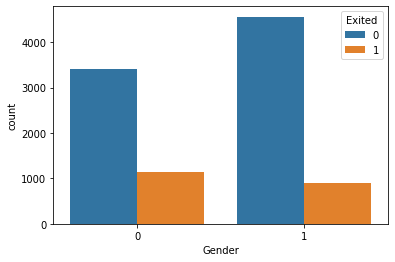

In [38]:
import seaborn as sns


sns.countplot(x='Gender', hue='Exited', data=data)

<Axes: xlabel='Exited', ylabel='count'>

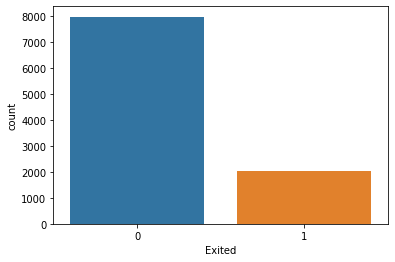

In [39]:
sns.countplot(x='Exited', data=data)

<Axes: xlabel='Exited', ylabel='CreditScore'>

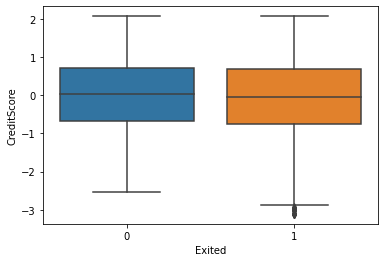

In [40]:
sns.boxplot(x='Exited', y='CreditScore', data=data)

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

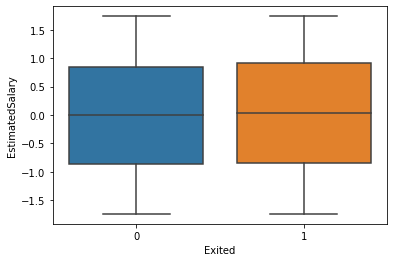

In [41]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)

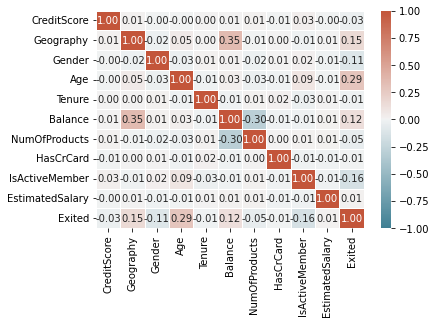

In [42]:
corr_matrix = data.corr()

# Set up a custom color map with diverging colors
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with the custom color map
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1, linewidths=.5, fmt='.2f')

plt.show()

In [65]:
# Define mapping dictionaries for 'Geography' and 'Gender'
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
gender_mapping = {'Female': 0, 'Male': 1}

# Perform label encoding using the mapping dictionaries
data['Geography'] = data['Geography'].map(geography_mapping)
data['Gender'] = data['Gender'].map(gender_mapping)

# Display the modified DataFrame
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [66]:
# List of columns to standardize
columns_to_normalize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Normalize the specified columns
for column in columns_to_normalize:
    min_value = data[column].min()
    max_value = data[column].max()
    data[column] = (data[column] - min_value) / (max_value - min_value)

In [57]:
# # List of columns to standardize
# columns_to_standardize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# # Standardize the specified columns
# for column in columns_to_standardize:
#     mean_value = data[column].mean()
#     std_value = data[column].std()
#     data[column] = (data[column] - mean_value) / std_value


In [46]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.564169,NaN,NaN,-0.659985,3,0.324103,2,0,0,-1.013761,0
1,-0.284820,NaN,NaN,0.388852,1,-1.225786,2,1,1,0.804880,0
2,-0.512438,NaN,NaN,0.484200,4,-1.225786,2,1,0,-0.722110,0
3,-1.495332,NaN,NaN,1.914433,8,0.683782,2,1,1,1.227419,0
4,-0.936634,NaN,NaN,-1.136730,7,0.777438,1,1,1,0.253511,0


## Model Development Shallow ANN (MLP)

In [71]:
#Split the dataset into training and testing subsets.
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

# Define the split ratio (e.g., 90% training and 10% testing)
split_ratio = 0.9
split_index = int(len(data) * split_ratio)

# Split the dataset into training and testing sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Separate the features (X) from the target (y) in both the training and testing sets
X_train = train_data.drop('Exited', axis=1)
y_train = train_data['Exited']
X_test = test_data.drop('Exited', axis=1)
y_test = test_data['Exited']

# Display the shapes of the resulting DataFrames
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9000, 10)
y_train shape: (9000,)
X_test shape: (1000, 10)
y_test shape: (1000,)


In [97]:
X, Y = X_train, y_train

In [98]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [99]:
X.shape, Y.shape

((9000, 10), (9000,))

In [100]:
class Shallow_ANN():

  def fit(self, X, y, neurons = 10, eta = 0.1, epochs = 1e3, show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(y)
    #print("Y shape:", Y.shape) 
    N,D = X.shape
    K = Y.shape[1]
    #weights and biases initialize
    self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons], [neurons,K]),1)}
    self.B = {l: np.random.randn(M) for l,M in enumerate([neurons, K],1)}
    #define activations
    self.a = {1:np.tanh, 2:sigmoid}

    J = np.zeros(epochs)

    #GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      #print("self.Z[2] shape:", self.Z[2].shape)
      J[epoch] = cross_entropy(Y, self.Z[2])

      #Weights and Biases Update Rules
      #For Layer 2 (Output) 
      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      #For Layer 1
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title(f"Training Curve (Neurons: {neurons}, Eta: {eta}, Epochs: {epochs})")
      plt.savefig(f"curve_neurons_{neurons}_eta_{eta}_epochs_{epochs}.png", dpi=300)
      # plt.title("Training Curve")
      plt.show()
  
  def __forward__(self, X):
    self.Z = {0:X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])
  
  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [101]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def cross_entropy(Y, P_hat):
  # print("Y type:", type(Y))
  # print("P_hat type:", type(P_hat))
  return -np.sum(Y*np.log(P_hat))

# def cross_entropy(Y, P_hat):
#     epsilon = 1e-12  # Add a small constant to avoid log(0) issues
#     return -np.sum(Y * np.log(P_hat + epsilon))


In [102]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def bincross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [103]:
my_ann = Shallow_ANN()

In [104]:
def one_hot_encode(H):
  N = len(y_train)
  K = len(set(y_train))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y_train[i]] = 1
  
  return Y

In [105]:
N,D = X_train.shape
Y.shape

(9000,)

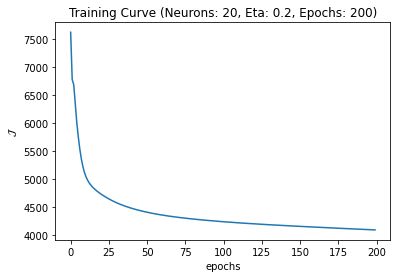

In [106]:
my_ann.fit(X_train,y_train, neurons=20, eta = 2e-1, epochs=2e2, show_curve=True)
y_hat =my_ann.predict(X_test)

In [79]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    print(TP,FP,FN,TN)
    return np.array([[TP, FP], [FN, TN]])

# y_hat = my_ann.predict(X_test)
# cm = confusion_matrix(y_test, y_hat)

# print("Confusion Matrix:")
# print(cm)


In [80]:
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]
Accuracy = (TP+TN) / (TP + FP + FN + TN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_score:", F1_score)

NameError: ignored

In [81]:
# #Accuracy
# Accuracy = (TP+TN) / (TP + FP + FN + TN)
# Accuracy

In [82]:
# #Precision
# Precision = TP / (TP + FP)
# Precision

In [83]:
# #Recall 
# Recall = TP / (TP + FN)
# Recall

In [84]:
# # F1 score
# F1_score = 2 * (Precision * Recall) / (Precision + Recall)
# F1_score
# #the F1 score is quite low (0.0563), which suggests that the model is not performing well for this particular problem.

In [85]:
# import pandas as pd
# import os

# # Round the numbers to two decimal places
# Accuracy = round(Accuracy, 2)
# Precision = round(Precision, 2)
# Recall = round(Recall, 2)
# F1_score = round(F1_score, 2)

# # Save the rounded values to a list
# metrics = [Accuracy, Precision, Recall, F1_score]

# # Create a DataFrame with the metrics
# df_metrics = pd.DataFrame([metrics], columns=['Accuracy', 'Precision', 'Recall', 'F1_score'])

# file_path = 'metrics.csv'

# # Check if the file exists, if not create it with the header
# if not os.path.exists(file_path):
#     df_metrics.to_csv(file_path, index=False)
# else:
#     # If the file exists, append the metrics without the header
#     df_metrics.to_csv(file_path, mode='a', index=False, header=False)


In [107]:
import os

def train_and_evaluate(neurons=1000, eta=0.1, epochs=int(1e3)):
    my_ann = Shallow_ANN()
    my_ann.fit(X_train, y_train, neurons=neurons, eta=eta, epochs=epochs, show_curve=True)
    y_hat = my_ann.predict(X_test)
    cm = confusion_matrix(y_test, y_hat)

    # Compute the performance metrics
    TP = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[1, 1]
    Accuracy = (TP+TN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1_score = 2 * (Precision * Recall) / (Precision + Recall)
    print("Accuracy:", Accuracy)
    print("Precision:", Precision)
    print("Recall:", Recall)
    print("F1_score:", F1_score)

    # Metrics to dict
    metrics = {
        "Accuracy": round(Accuracy, 2),
        "Precision": round(Precision, 2),
        "Recall": round(Recall, 2),
        "F1_score": round(F1_score, 2),
        "Neurons": neurons,
        "Eta": eta,
        "Epochs": epochs
    }

    # Save the metrics to a DataFrame
    metrics_df = pd.DataFrame([metrics])
 
    # Append the new metrics to the existing CSV file
    file_exists = os.path.isfile('performance_metrics.csv')
    if file_exists:
        metrics_df.to_csv('performance_metrics.csv', mode='a', header=False, index=False)
    else:
        metrics_df.to_csv('performance_metrics.csv', index=False)

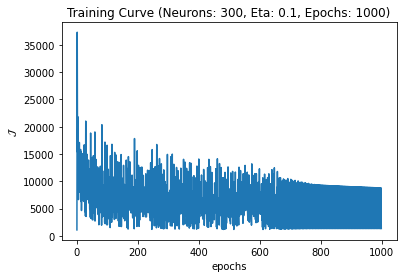

60 24 144 772
Accuracy: 0.832
Precision: 0.7142857142857143
Recall: 0.29411764705882354
F1_score: 0.4166666666666667


In [113]:
train_and_evaluate(neurons=300, eta=0.1, epochs=int(1e3))

## Model Development 2. ANN

```
`# This is formatted as code`
```



In [ ]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1
  
  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):

    epochs = int(epochs)
    if self.mode:
      Y=y
    else:
      Y = one_hot_encode(y)
    
    N,D = X.shape
    K= Y.shape[1]

    #Initialize Weights
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate (zip(([D]+self.architecture), (self.architecture+[K])),1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K], 1)}

    if self.activations is None:
      self.a = {l: ReLU for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations,1)}
    
    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = sigmoid
    
    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L]) # the number of output layer
      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted(self.W.keys(), reverse=True):
        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.B[l] -= eta*dB

        if l > 1:
          dZ = dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.title(f"Training Curve (Architectue: {self.architecture}, Activations: {self.activations}, Epochs: {epochs})")
        plt.savefig(f"architecture_{self.architecture}_activations_{self.activations}_epochs_{epochs}.png", dpi=300)
        plt.show()
  
  def __forward__(self, X):
    self.Z = {0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)       

In [ ]:
def derivative(Z,a):

  if a == linear:
    return 1
  
  elif a == sigmoid:
    return Z*(1-Z)

  elif a == np.tanh:
    return 1-Z*Z

  elif a == ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("Unknown Activation Function") 

In [ ]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH / eH.sum (axis=1, keepdims=True)

#Loss Functions
def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat))

def one_hot_encode(y):

  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]] = 1
  return Y

# Metrics
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def R2(y, y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

In [ ]:
import os

def train_and_evaluate(architecture=[8,8,8], activations=[np.tanh]*3, eta=0.01, epochs=int(1e3)):
    # my_ann = ANN([25,20], [np.tanh, ReLU])
    # my_ann.fit(X_train, y_train, neurons=neurons, eta=eta, epochs=epochs, show_curve=True)
    # y_hat = my_ann.predict(X_test)
    # cm = confusion_matrix(y_test, y_hat)
    ann = ANN(architecture=architecture, activations=activations)
    ann.fit(X_train,y_train, epochs=epochs,eta=eta, show_curve = True)
    y_hat = ann.predict(X_test)
    cm = confusion_matrix(y_test, y_hat)
    
    # Compute the performance metrics
    TP = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[1, 1]
    Accuracy = (TP+TN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1_score = 2 * (Precision * Recall) / (Precision + Recall)
    print("Accuracy:", Accuracy)
    print("Precision:", Precision)
    print("Recall:", Recall)
    print("F1_score:", F1_score)

    # Metrics to dict
    metrics = {
        "Accuracy": round(Accuracy, 2),
        "Precision": round(Precision, 2),
        "Recall": round(Recall, 2),
        "F1_score": round(F1_score, 2),
        "Architecture": architecture,
        "Activations": activations,
        "Eta": eta,
        "Epochs": epochs
    }

    # Save the metrics to a DataFrame
    metrics_df = pd.DataFrame([metrics])
 
    # Append the new metrics to the existing CSV file
    file_exists = os.path.isfile('ann_metrics.csv')
    if file_exists:
        metrics_df.to_csv('ann_metrics.csv', mode='a', header=False, index=False)
    else:
        metrics_df.to_csv('ann_metrics.csv', index=False)

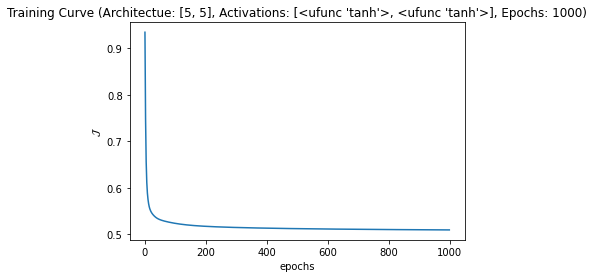

0 0 183 817
Accuracy: 0.817
Precision: nan
Recall: 0.0
F1_score: nan


<ipython-input-251-aa53d157b670>:19: RuntimeWarning: invalid value encountered in long_scalars
  Precision = TP / (TP + FP)


In [ ]:
train_and_evaluate(architecture=[5,5], activations=[np.tanh]*2, eta=0.1, epochs=int(1e3))

## Model Development. Logistic Regression

In [ ]:
def softmax(h):
  return (np.exp(h.T)/ np.sum(np.exp(h), axis=1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def binary_cross_entropy(Y, P_hat):
    return -(1/len(Y)) * np.sum(Y * np.log(P_hat) + (1 - Y) * np.log(1 - P_hat))

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
# class MVLogisticRegression():

#   def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
#     epochs = int(epochs)
#     N,D = X.shape

#     K = len(np.unique(y))
#     y_values = np.unique(y, return_index=False)
#     Y = indices_to_one_hot(y,K).astype(int)
#     #Initilize W,B
#     self.B = np.random.randn(N,K)
#     self.W = np.random.randn(D,K)

#     J = np.zeros(epochs)

#     for epoch in range(epochs):
#       P_hat = self.__forward__(X)
#       J[epoch] = cross_entropy(Y, P_hat)
#       # Weights and Bias update rules
#       self.W -= eta*(1/N)*X.T@(P_hat-Y)
#       self.B -= eta*(1/N)*np.sum(P_hat-Y,axis=0)
  
#     if show_curve:
#       plt.figure()
#       plt.plot(J)
#       plt.xlabel("epochs")
#       plt.ylabel("$\mathcal{J}$")
#       plt.title("Training Curve")

#   def __forward__(self, X):
#     return softmax(X@self.W+self.B)
  
#   def predict(self, X):
#     return np.argmax(self.__forward__(X), axis=1)

In [ ]:
class MVLogisticRegression():

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape

        K = len(np.unique(y))
        y_values = np.unique(y, return_index=False)
        Y = indices_to_one_hot(y, K).astype(int)
        # Initialize W, B
        self.W = np.random.randn(D, K)
        self.B = np.random.randn(1, K)

        J = np.zeros(epochs)

        for epoch in range(epochs):
            P_hat = self.__forward__(X)
            J[epoch] = binary_cross_entropy(Y, P_hat)
            # Weights and Bias update rules
            self.W -= eta * (1 / N) * X.T @ (P_hat - Y)
            self.B -= eta * (1 / N) * np.sum(P_hat - Y, axis=0)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title(f"Training Curve (Eta: {eta}, Epochs: {epochs})")
            plt.savefig(f"eta_{eta}_epochs_{epochs}.png", dpi=300)
            plt.title("Training Curve")

    def __forward__(self, X):
        return softmax(X @ self.W + self.B)

    def predict(self, X):
        return np.argmax(self.__forward__(X), axis=1)


In [ ]:
# X_train
# X_test
#set(y_train)
# set(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9000, 10), (9000,), (1000, 10), (1000,))

In [ ]:
multlogReg = MVLogisticRegression()

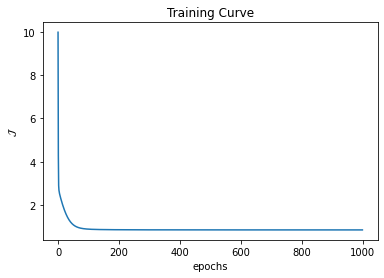

In [ ]:
multlogReg.fit(X_train,y_train, eta=1e-1, epochs=1e3, show_curve=True)

In [ ]:
y_hat = multlogReg.predict(X_test)
accuracy(y_test, y_hat)

0.808

In [ ]:
import os

def train_and_evaluate(eta=0.1, epochs=int(1e3)):
    
    multlogReg = MVLogisticRegression()
    multlogReg.fit(X_train,y_train, eta=eta, epochs=epochs, show_curve=True)
    y_hat = multlogReg.predict(X_test)
    cm = confusion_matrix(y_test, y_hat)

    # Compute the performance metrics
    TP = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[1, 1]
    Accuracy = (TP+TN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1_score = 2 * (Precision * Recall) / (Precision + Recall)
    print("Accuracy:", Accuracy)
    print("Precision:", Precision)
    print("Recall:", Recall)
    print("F1_score:", F1_score)

    # Metrics to dict
    metrics = {
        "Accuracy": round(Accuracy, 2),
        "Precision": round(Precision, 2),
        "Recall": round(Recall, 2),
        "F1_score": round(F1_score, 2),
        "Eta": eta,
        "Epochs": epochs
    }

    # Save the metrics to a DataFrame
    metrics_df = pd.DataFrame([metrics])
 
    # Append the new metrics to the existing CSV file
    file_exists = os.path.isfile('mvlogistic_metrics.csv')
    if file_exists:
        metrics_df.to_csv('mvlogistic_metrics.csv', mode='a', header=False, index=False)
    else:
        metrics_df.to_csv('mvlogistic_metrics.csv', index=False)

34 29 161 776
Accuracy: 0.81
Precision: 0.5396825396825397
Recall: 0.17435897435897435
F1_score: 0.26356589147286824


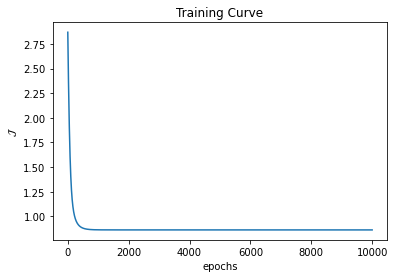

In [ ]:
train_and_evaluate(eta=0.05, epochs=int(1e4))